<a href="https://colab.research.google.com/github/PauloSergio0510/cdd_embraer_titanic/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Titanic Embraer
Etapas
1. Definição do Problema
2. Obtenção dos Dados
3. Exploração dos Dados
4. Preparação dos Dados
5. Modelagem
6. Avaliação
7. Relatório Científico
8. Apresentação

## Etapa 1 - Definição do Problema

A construção do Titanic levou cerca de 2 anos e custou 7,5 milhões de dólares (valores da época). Com 269 metros de comprimento, 28 metros de largura e 53 metros de altura, operava com uma tripulação de 892 pessoas e poderia levar até 2435 passageiros (espalhados pelas três classes disponíveis).

Pensado para ser o mais seguro e luxuoso navio da época, foi lançado ao mar em 1911, ganhando fama de ser “inafundável”.

O naufrágio do Titanic teve como fatores contribuintes causas naturais (como o clima) e causas humanas (negligência e excesso de confiança). Independente das causas, o fato é que seu naufrágio matou 1502 pessoas de um total de 2224 passageiros.

Embora aqueles que escaparam com vida tiveram sua boa dose de sorte, alguns grupos de pessoas eram mais propensos a escaparem da morte do que outros. Por exemplo, mulheres, crianças e passageiros da 1ª Classe. Assim, nota-se que existe algum padrão que pode ser extraído dos dados brutos.

## Etapa 2 - Obtenção dos Dados

### 2.1: Importando as bibliotecas necessárias

O comando import realiza a importação das biblioetecas, as bibliotecas contêm comandos uteis para o desenvolvimento do projeto.

* O pacote numpy possui funções de linear álgebra.
* O pacote Pandas possui funções de data processing, CSV file I/O.
* O pacote matplot possui funções para criação de gráficos e visualizações de dados.
* O pacote seaborn possui funções para análise de dados estatísticos.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

### 2.2: Carregar arquivos CSV
* conjunto de treinamento (train.csv)
* conjunto de teste (test.csv)

In [0]:
dadostraincsv = pd.read_csv("train.csv")
dadostestcsv = pd.read_csv("test.csv")

## Etapa 3 - Exploração dos Dados

### 3.1: Listar a quantidade de variáveis (colunas) e o tamanho (linhas) do conjunto treinamento (train.csv).
* A função de saída print() exibe o resultado na tela.

In [115]:
print("Variáveis:\t{}\nEntradas:\t{}".format(dadostraincsv.shape[1], dadostraincsv.shape[0]))

Variáveis:	12
Entradas:	891


### 3.2: Exibir o tipo de cada variável da Dataframe.
* A função de saída display() exibe o dataframe formatado.

In [116]:
display(dadostraincsv.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 3.3: Exibir as 5 primeiras entradas do conjunto de dados.
Para exibir uma quantidade maior de entradas adicionar o valor como parâmetro da função head(). Por exemplo: display(dadostraincsv.head(50))

In [117]:
dadostraincsv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3.4: Exibir a distribuição estatística dos dados:

In [118]:
dadostraincsv.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 3.5: Exibir histograma das variáveis numéricas:

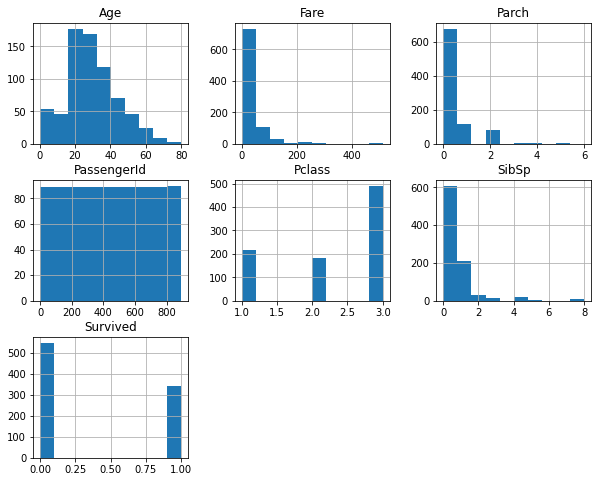

In [119]:
dadostraincsv.hist(figsize=(10,8));

#### 3.5.1: Qual a porcentagem dos passageiros sobreviventes?

In [0]:
dadostraincsv_idade = dadostraincsv.copy()
dadostraincsv_idade.drop(dadostraincsv[dadostraincsv['Age'].isnull() == True].index ,inplace=True)

In [121]:
dadostraincsv['Not Survived'] = dadostraincsv['Survived'].map({0:1,1:0})
print('Sobreviventes     :', dadostraincsv['Survived'].value_counts()[1])
print('Não Sobreviventes :', dadostraincsv['Survived'].value_counts()[0])

Sobreviventes     : 342
Não Sobreviventes : 549


Text(0, 0.5, '')

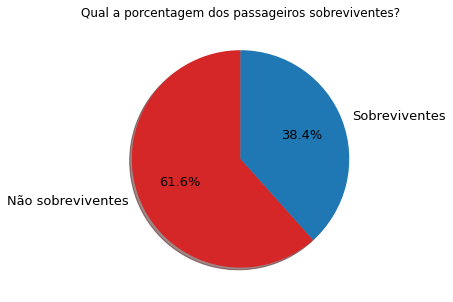

In [122]:
dadostraincsv['Survived'].value_counts().plot.pie(colors=('tab:red', 'tab:blue'), 
                                       title='Qual a porcentagem dos passageiros sobreviventes?', 
                                       fontsize=13, shadow=True, startangle=90,autopct='%1.1f%%',
                                       labels=('Não sobreviventes','Sobreviventes'),
                                       figsize=(5,5)).set_ylabel('')

#### 3.5.2: Qual a faixa etária dos passageiros do Titanic?

Text(0, 0.5, 'Frequência')

<Figure size 432x288 with 0 Axes>

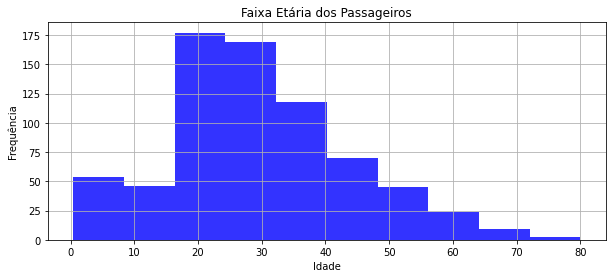

In [123]:
plt.figure();
dadostraincsv_idade.hist(column='Age', color=('blue'), alpha=0.8, bins=10, figsize=(10,4))
plt.title('Faixa Etária dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')

#### 3.5.3: As Crianças, sobreviveram mais dos que os Adultos?

(Text(0, 0.5, ''), Text(0.5, 0, ''))

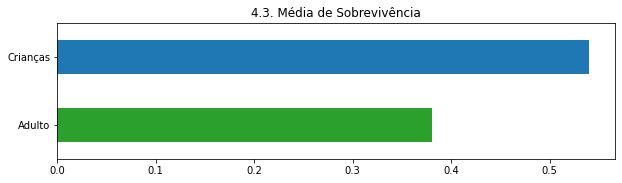

In [124]:
dadostraincsv_idade['Crianca_Adulto'] = 0
dadostraincsv_idade.loc[dadostraincsv_idade[dadostraincsv_idade['Age'] < 18].index, 'Crianca_Adulto'] = 'Crianças'
dadostraincsv_idade.loc[dadostraincsv_idade[dadostraincsv_idade['Age'] >= 18].index, 'Crianca_Adulto'] = 'Adulto'
dadostraincsv_idade.groupby('Crianca_Adulto')[['Survived']].mean()

dadostraincsv_idade.groupby('Crianca_Adulto')['Survived'].mean().plot.barh(title='4.3. Média de Sobrevivência', figsize=(10,2.5),
                                                                color=('tab:green','tab:blue')).set_ylabel(''),plt.xlabel('')

## Etapa 4 - Preparação dos Dados

### 4.1: Juntar os conjuntos de dados de treino e teste.

In [125]:
# salvar os índices dos datasets para recuperação posterior
dadostraincsv_idx = dadostraincsv.shape[0]
dadostestcsv_idx = dadostestcsv.shape[0]

# salvar PassengerId para submissao ao Kaggle
passengerId = dadostestcsv['PassengerId']

# extrair coluna 'Survived' e excluir ela do dataset treino
target = dadostraincsv.Survived.copy()
dadostraincsv.drop(['Survived'], axis=1, inplace=True)

# concatenar treino e teste em um único DataFrame
df_merged = pd.concat(objs=[dadostraincsv, dadostestcsv], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 12)


### 4.2: Selecionar as features.
Como qualquer conjuto dedos, pode existir a necessidade de retirar features que não serão utilizadas no modelo de Machine Learning.

In [126]:
display(df_merged.head())

#Função drop remove as colunas do DataFrame.
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

#Exibir as 5 primeiras entradas do conjunto de dados depois de remover features.
display(df_merged.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Not Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Not Survived
0,3,male,22.0,1,0,7.2500,S,1.0
1,1,female,38.0,1,0,71.2833,C,0.0
2,3,female,26.0,0,0,7.9250,S,0.0
3,1,female,35.0,1,0,53.1000,S,0.0
4,3,male,35.0,0,0,8.0500,S,1.0


### 4.3: Exibir os valores faltantes nos datasets de treino e teste.

In [127]:
df_merged.isnull().sum()

Pclass            0
Sex               0
Age             263
SibSp             0
Parch             0
Fare              1
Embarked          2
Not Survived    418
dtype: int64

### 4.4: Completar os valores faltantes:
* Age (Idade) e fare (tarifa): Foi calculado o valor da mediana.
* Embarked (Porto de Embarque): Foi adicionado o valor com maior frequência.

In [0]:
# age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# embarked
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

### 4.5: Preparar as variáveis para o modelo de Machine Learnig.
* O modelo matemático exige que trabalhemos com variáveis numéricas, ou seja, temos transformar os dados de entrada que estão em formato categoria para números.

In [129]:
# converter 'Sex' em 0 e 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# dummie variables para 'Embaked'
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Not Survived,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,1.0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0.0,0,1,0,0
2,3,1,26.0,0,0,7.9250,0.0,0,0,0,1
3,1,1,35.0,1,0,53.1000,0.0,0,0,0,1
4,3,0,35.0,0,0,8.0500,1.0,0,0,0,1


### 4.6: Recuperar os conjunto de dados de treino e teste.

In [0]:
# recuperar datasets de treino e teste
dadostraincsv = df_merged.iloc[:dadostraincsv_idx]
dadostestcsv = df_merged.iloc[dadostraincsv_idx:]

## Etapa 5 e 6 - Modelagem & Avaliação

### 5.1: Importar bibliotecas do modelo de Machine Learning de Regressão Logística.

In [0]:
from sklearn.linear_model import LogisticRegression

In [132]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(dadostraincsv, target)

# verificar a acurácia do modelo
acc_logReg = round(lr_model.score(dadostraincsv, target) * 100, 2)
print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))

Acurácia do modelo de Regressão Logística: 100.0


### 5.2: Importar biblioteca do modelo de Machine Learning de Árvore de Decisão.

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [134]:
# criar um modelo de árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(dadostraincsv, target)

# verificar a acurácia do modelo
acc_tree = round(tree_model.score(dadostraincsv, target) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))

Acurácia do modelo de Árvore de Decisão: 100.0


## Etapa 7 - Relatório Científico

## Etapa 8 - Apresentação